# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matthewblair/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_news_en = newsapi.get_everything(q="bitcoin AND Bitcoin", language="en", sort_by="relevancy")
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")
# Show sample article
bitcoin_news_en["articles"][5]




Total articles about Bitcoin: 8481


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Tom Arnold, Karin Strohecker',
 'title': "El Salvador bitcoin plan 'bulletproof', president says - Reuters",
 'description': 'El Salvador is determined to push ahead with making bitcoin legal tender, a process that will bring only small risks and prove a "leap forward for humanity", the country\'s President Nayib Bukele said in an interview with a bitcoin journalist.',
 'url': 'https://www.reuters.com/article/el-salvador-bitcoin-bukele-idUSL5N2O53AL',
 'urlToImage': 'https://s1.reutersmedia.net/resources_v2/images/rcom-default.png?w=800',
 'publishedAt': '2021-06-23T13:46:00Z',
 'content': 'LONDON, June 23 (Reuters) - El Salvador is determined to push ahead with making bitcoin legal tender, a process that will bring only small risks and prove a leap forward for humanity, the countrys Pr… [+2648 chars]'}

In [6]:
print(api_key)

a032cb7dd21a4415a6101a3f4182a0b7


In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news_en = newsapi.get_everything(q="ethereum AND Ethereum",language="en",page_size=50,sort_by="relevancy")
# Print total articles
print(f"Total articles about Etherum: {eth_news_en['totalResults']}")
# Show sample article
eth_news_en["articles"][5]

Total articles about Etherum: 2487


{'source': {'id': 'business-insider', 'name': 'Business Insider'},
 'author': 'hrobertson@businessinsider.com (Harry Robertson)',
 'title': 'More than $13 billion worth of ether has been staked on ethereum 2.0 as momentum builds behind the network overhaul',
 'description': 'Users are putting forward "stakes" of ether to gain the right to validate transactions on the ethereum 2.0 network and earn more coins.',
 'url': 'https://markets.businessinsider.com/news/stocks/ether-eth-ethereum-2-network-upgrades-staking-jpmorgan-2021-7',
 'urlToImage': 'https://images2.markets.businessinsider.com/60e2fbcb93b49f0018ee07d1?format=jpeg',
 'publishedAt': '2021-07-05T12:54:02Z',
 'content': 'Ether is the cryptocurrency of the ethereum network.\r\nPhotothek/Getty Images\r\nEther holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement … [+1935 chars]'}

In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!




def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

btc_df = create_df(bitcoin_news_en["articles"], "en")
btc_df.tail()

,title,description,text,date,language,compound,positive,negative,neutral
15,Bitcoin slumps after China crackdown - Reuters,Bitcoin tumbled on Monday after news of a fres...,Posted \r\nBitcoin tumbled on Monday after new...,2021-06-21,en,0.3182,0.133,0.00,0.867
16,"Bitcoin falls 7.4 percent to $32,094 - Reuters","Bitcoin dropped 7.37% to $32,094.44 on Friday,...",By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,2021-06-25,en,-0.3818,0.000,0.08,0.920
17,Bitcoin drops over 5% to $33226.36 - Reuters,"Bitcoin dropped 5.17% to $33,226.36 on Thursda...",A representations of virtual currency Bitcoin ...,2021-07-01,en,0.0000,0.000,0.00,1.000
18,Sotheby's diamond auction marks bitcoin milest...,A rare pear-shaped diamond that is expected to...,Posted \r\nA rare pear-shaped diamond that is ...,2021-06-21,en,0.5994,0.133,0.00,0.867
19,"Bitcoin falls 8.5% to $31,700 - Reuters","Bitcoin dipped 8.51% to $31,699.83 at 22:04 GM...",By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,2021-06-25,en,-0.3818,0.000,0.08,0.920


In [12]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_df= create_df(eth_news_en["articles"],"en")
eth_df.tail()

,title,description,text,date,language,compound,positive,negative,neutral
45,This crowdsourced payments tracker wants to so...,"Ransomware attacks, fueled by COVID-19 pandemi...","Ransomware attacks, fueled by COVID-19 pandemi...",2021-07-09,en,-0.8126,0.037,0.249,0.714
46,Building Permanent and Censorship-Resistant Bl...,The internet nowadays is ephemeral. Layers upo...,The internet nowadays is ephemeral. Layers upo...,2021-06-29,en,0.4939,0.155,0.070,0.775
47,Elon Musk's tweet about a shiba inu sends the ...,"At 7:23 am ET, Musk published a tweet to his 5...",Dogecoin spinoff shiba inu spiked to its highe...,2021-06-25,en,0.0000,0.000,0.000,1.000
48,10 things you need to know before the opening ...,This is what traders are talking about.,Traders and financial professionals work on th...,2021-07-02,en,0.5859,0.124,0.000,0.876
49,Elon Musk says Tesla's caused him two-thirds o...,"""This is a hella hard situation,"" Musk told Tw...","Elon Musk said two-thirds of the ""personal and...",2021-07-21,en,-0.5106,0.000,0.096,0.904


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.018580,0.055650,0.048850,0.895450
std,0.410904,0.066291,0.053598,0.075186
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.840250
50%,0.000000,0.000000,0.057500,0.907500
75%,0.220025,0.108750,0.077750,0.927750
max,0.726400,0.178000,0.184000,1.000000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!


eth_df.describe()


,compound,positive,negative,neutral
count,50.000000,50.000000,50.000000,50.000000
mean,0.150948,0.056140,0.024740,0.919120
std,0.375215,0.062428,0.050194,0.073899
min,-0.812600,0.000000,0.000000,0.714000
25%,0.000000,0.000000,0.000000,0.876500
50%,0.088950,0.044500,0.000000,0.925000
75%,0.460950,0.097500,0.039000,1.000000
max,0.771700,0.194000,0.249000,1.000000


In [15]:
#ETH has highest mean positive score
#ETH has highest compound score
#ETH had the highest positive score

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
# YOUR CODE HERE!
sw =stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = [',', 'how', 'what', 'https', 'damn','much','ha', 'btc','it']
for addon in sw_addon:
    sw.append(addon)
sw = set(sw)


In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    
   
    regex = re.compile("[^a-zA-Z ]")
       # Remove the punctuation from text
    
    re_clean = regex.sub('', text)
       
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens
    
   
    


In [25]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
# Create a new tokens column for bitcoin


bitcoin_tokens = btc_df.copy()

tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})
    
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df

tokenized = []
for i in bitcoin_tokens['title']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})
    
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

bitcoin_tokens.head()

,title,description,text,date,language,compound,positive,negative,neutral,tokens_text,tokens_title
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,en,0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,...","[use, selfdriving, cars, supercomputers]"
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,en,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, reach...","[kaseya, ransomware, attacker, demand, million..."
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,en,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin...","[gang, behind, huge, cyberattack, demand, bitc..."
3,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ...","[crypto, startup, phantom, bank, funding, andr..."
4,Michael Arrington’s next act,"As longtime TechCrunch readers know well, Mich...","As longtime TechCrunch readers know well, Mich...",2021-07-21,en,0.2732,0.097,0.000,0.903,"[longtime, techcrunch, reader, know, well, mic...","[michael, arringtons, next, act]"


In [26]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_tokens = eth_df.copy()


tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})
    
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

tokenized_eth = []
for i in ethereum_tokens['title']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

    
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

ethereum_tokens.head()

,title,description,text,date,language,compound,positive,negative,neutral,tokens_text,tokens_title
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,en,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest...","[crypto, investor, like, terraform, labs, they..."
1,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ...","[crypto, startup, phantom, bank, funding, andr..."
2,Ethereum now has more active addresses than bi...,Ethereum overtook bitcoin in the number of act...,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,2021-07-02,en,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook...","[ethereum, active, address, bitcoin, sign, tra..."
3,Ethereum Co-Founder Says Safety Concern Has Hi...,"""Anthony Di Iorio, a co-founder of the Ethereu...","""Anthony Di Iorio, a co-founder of the Ethereu...",2021-07-17,en,0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw...","[ethereum, cofounder, says, safety, concern, q..."
4,More than $13 billion worth of ether has been ...,"Users are putting forward ""stakes"" of ether to...","Ether holders have ""staked"" more than $13 bill...",2021-07-05,en,0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto...","[billion, worth, ether, staked, ethereum, mome..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [30]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!


all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)
        
all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)
        
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_df_btc=bigram_counter(all_bitcoin_words)
bigram_df_eth=bigram_counter(all_eth_words)

        
        




In [31]:
bigram_df_btc.head()

,bigram,count
0,"(reuters, bitcoin)",6
1,"(june, reuters)",5
2,"(losing, previous)",4
3,"(previous, closebitcoin)",4
4,"(closebitcoin, world)",4


In [32]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_df_eth.head()

,bigram,count
0,"(reuters, bitcoin)",9
1,"(taken, june)",8
2,"(char, representation)",8
3,"(illustration, taken)",8
4,"(bitcoin, ethereum)",7


In [33]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [37]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
top_btc=token_count(all_bitcoin_words)
top_btc

[('char', 19), ('bitcoin', 18), ('reuters', 14)]

In [38]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
top_eth=token_count(all_eth_words)
top_eth

[('char', 50), ('bitcoin', 24), ('ethereum', 19)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

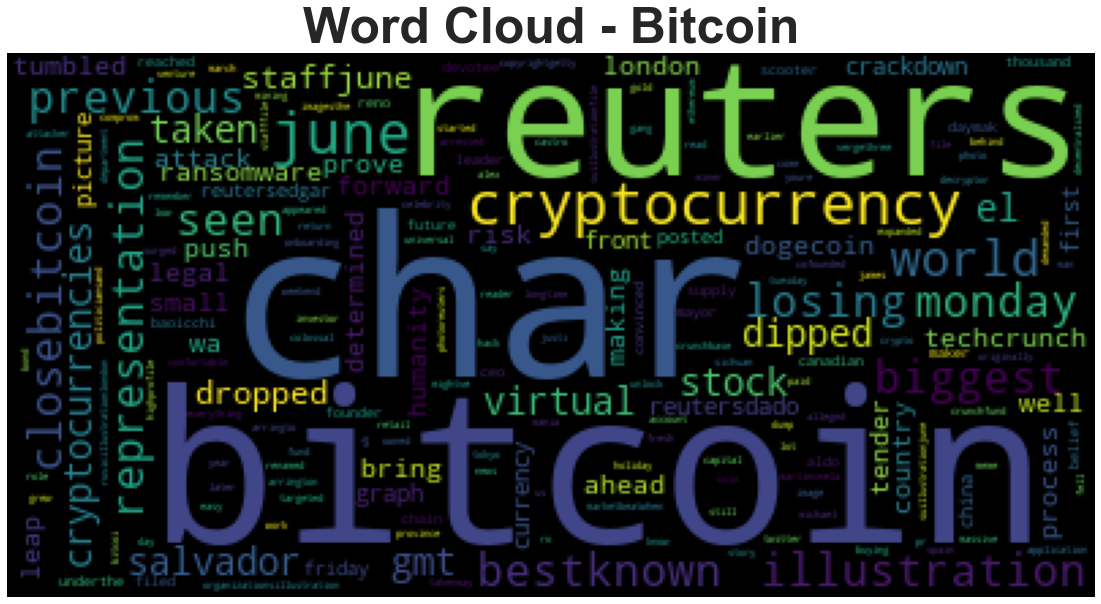

In [40]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)


wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.title('Word Cloud - Bitcoin', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

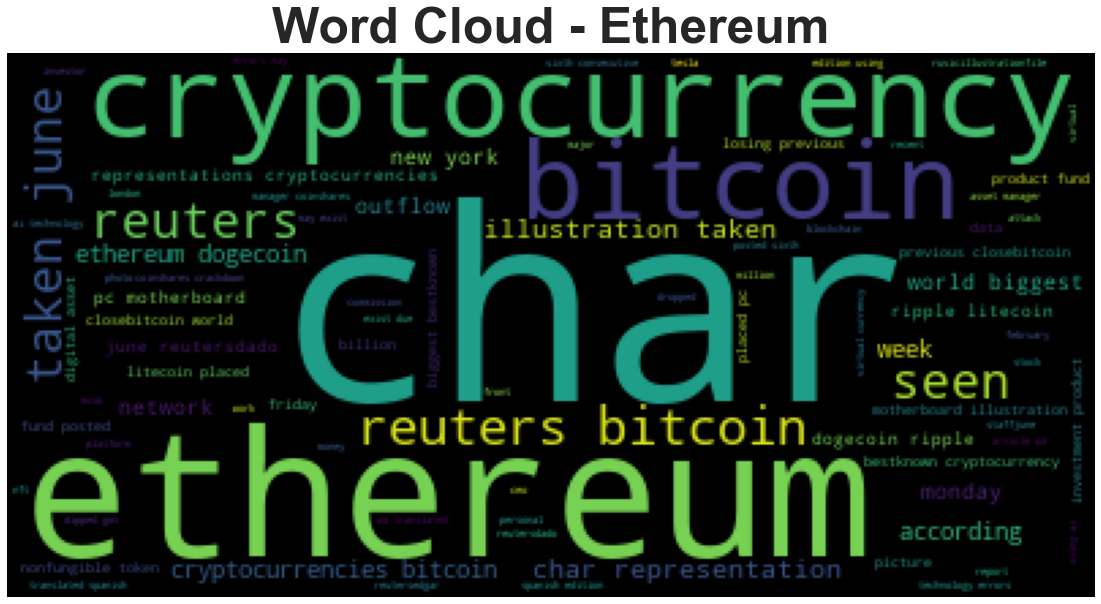

In [41]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.title('Word Cloud - Ethereum', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

In [43]:
!pip install spacy

     |████████████████████████████████| 6.0 MB 5.5 MB/s eta 0:00:01     |███████████████████████▍        | 4.4 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 34.0 MB/s eta 0:00:01
     |████████████████████████████████| 598 kB 31.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 39.5 MB/s eta 0:00:01
     |████████████████████████████████| 450 kB 32.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.3 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.8 MB/s  eta 0:00:01
  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [44]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm


In [46]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 5.5 MB/s eta 0:00:01    |█▉                              | 788 kB 5.5 MB/s eta 0:00:03
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
one_string_bitcoin = ' '.join(bitcoin_sent)
one_string_bitcoin

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund Crunch

In [50]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(one_string_bitcoin)
# Add a title to the document
bitcoin_doc.user_data['title'] = 'Bitcoin NER'




In [51]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')

In [52]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
earlier this year DATE
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
June 21 DATE
Reuters ORG
Monday DATE
China GPE
Sichuan GPE
as low as $32,288 MONEY
first ORDINAL
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG
8.57% 

---

### Ethereum NER

In [54]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
one_string_eth = " ".join(eth_sent)
one_string_eth

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars] "Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of personal safety concerns," reports Bloomberg, in a story shared by Slashdot… [+1550 chars] Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds aroun

In [55]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(one_string_eth)
eth_doc.user_data['title'] = 'Ethereum NER'

# Add a title to the document
# YOUR CODE HERE!

In [56]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [57]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print (ent, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Yuriko Nakao PERSON
Friday DATE
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
American Express ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
recent months DATE
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG
8.

---